<div align="center" style="margin-top:10px; margin-bottom:25px;">

  <h1 style="
      font-family: 'Segoe UI', sans-serif;
      font-size:36px;
      letter-spacing:2px;
      margin-bottom:6px;
      color:#2c3e50;">
      ABSTRACT 4 ALL
  </h1>

  <p style="
      font-size:14px;
      letter-spacing:1px;
      color:gray;
      margin-top:0;">
      Student Performance Analytics • Data Cleaning • Visualization • Insights
  </p>

  <img 
    src="https://raw.githubusercontent.com/Kalungup/student-performance-analytics/main/Abstract4all.png"
    width="140"
    style="margin-top:15px;"
  />

</div>


# Student Performance Analytics: Data Cleaning, Exploration, and Visualization


In [2]:
import numpy as np
import matplotlib as mp
import pandas as pd

## 1. Load data into pandas

In [6]:
#raw data file
DATA_URL = "https://raw.githubusercontent.com/Kalungup/student-performance-analytics/main/student_marks_10000.csv"
df = pd.read_csv(DATA_URL)
df

,Student_ID,Name,Age,Gender,City,Maths,English,Science,History,ICT,Parental_Education,Attendance_%
0,1,Student_1,20,Other,Stockholm,30,-12,-15,5,29,bachelor,54.59
1,2,Student_2,17,Male,Malmo,-2,82,-7,-6,18,PhD,91.41
2,3,Student_3,18,Male,Stockholm,86,64,103,93,53,bachelor,68.00
3,4,Student_4,20,Other,Malmo,48,79,72,62,76,HighSchool,76.85
4,5,Student_5,16,Fmale,Göteborg,101,73,-9,51,100,HighSchool,93.40
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Student_9996,17,male,Malmo,52,100,102,110,22,High School,73.51
9996,9997,Student_9997,16,Male,Lund,66,22,25,NaN,2,Masters,54.31
9997,9998,Student_9998,19,Female,Stockholm,79,absent,84,74,114,High School,90.73
9998,9999,Student_9999,19,male,stockholm,67,74,110,24,-20,High School,70.91


## 2.0 Data Cleaning

### 2.1 EDA

In [7]:
df.head()

,Student_ID,Name,Age,Gender,City,Maths,English,Science,History,ICT,Parental_Education,Attendance_%
0,1,Student_1,20,Other,Stockholm,30,-12,-15,5,29,bachelor,54.59
1,2,Student_2,17,Male,Malmo,-2,82,-7,-6,18,PhD,91.41
2,3,Student_3,18,Male,Stockholm,86,64,103,93,53,bachelor,68.00
3,4,Student_4,20,Other,Malmo,48,79,72,62,76,HighSchool,76.85
4,5,Student_5,16,Fmale,Göteborg,101,73,-9,51,100,HighSchool,93.40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student_ID          10000 non-null  int64  
 1   Name                10000 non-null  object 
 2   Age                 10000 non-null  int64  
 3   Gender              10000 non-null  object 
 4   City                10000 non-null  object 
 5   Maths               9822 non-null   object 
 6   English             9822 non-null   object 
 7   Science             9814 non-null   object 
 8   History             9802 non-null   object 
 9   ICT                 9801 non-null   object 
 10  Parental_Education  10000 non-null  object 
 11  Attendance_%        10000 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 937.6+ KB


### 🧭 Understanding the Dataset Structure with `df.info()`

The output of `df.info()` already reveals important data quality issues in the dataset.

#### ❗ Problem Identified
All subject columns are shown as **`object`** type:

- Maths
- English
- Science
- History
- ICT

This is incorrect.

Subject marks should be **numeric values**, not objects (text).

This happens because the columns contain:
- Text values like `"absent"`
- Empty cells
- Numbers stored as strings

#### 🎯 First Data Cleaning Task
The first step in cleaning this dataset is to **convert all subject columns to numeric values** so that proper analysis can be performed.


In [10]:
subjects = ["Maths", "English", "Science", "History", "ICT"]

for col in subjects:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')

### ✅ Converting Subject Columns to Numeric

After converting the subject columns to numeric values:

- All valid numbers are now properly stored as **floats**
- Invalid entries such as `"absent"` and blank cells have been automatically converted to **NaN**

This is the correct and expected behavior when cleaning real-world data.

#### ✔ Results Observed
- Subject columns are now of type **float**
- Missing or invalid entries are represented as **NaN**
- The dataset is now ready for proper numerical analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student_ID          10000 non-null  int64  
 1   Name                10000 non-null  object 
 2   Age                 10000 non-null  int64  
 3   Gender              10000 non-null  object 
 4   City                10000 non-null  object 
 5   Maths               9517 non-null   float64
 6   English             9496 non-null   float64
 7   Science             9535 non-null   float64
 8   History             9500 non-null   float64
 9   ICT                 9512 non-null   float64
 10  Parental_Education  10000 non-null  object 
 11  Attendance_%        10000 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 937.6+ KB


#### Investigate columns 

In [ ]:
df.describe()


,Student_ID,Age,Maths,English,Science,History,ICT,Attendance_%
count,10000.00000,10000.000000,9517.000000,9496.000000,9535.000000,9500.000000,9512.000000,10000.000000
mean,5000.50000,17.500300,49.294631,49.626790,49.031673,49.512000,49.739907,72.520815
std,2886.89568,2.287952,40.514915,40.471678,40.457446,40.109781,40.445202,18.781145
min,1.00000,14.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,40.000000
25%,2500.75000,16.000000,14.000000,15.000000,14.000000,15.000000,14.000000,56.020000
50%,5000.50000,18.000000,49.000000,50.000000,49.000000,50.000000,50.000000,72.335000
75%,7500.25000,19.000000,85.000000,85.000000,84.000000,84.000000,85.000000,88.710000
max,10000.00000,21.000000,119.000000,119.000000,119.000000,119.000000,119.000000,104.990000


In [46]:
df[subjects] = df[subjects].abs()

In [47]:
df.describe()

,Student_ID,Age,Maths,English,Science,History,ICT,Attendance_%
count,10000.00000,10000.000000,9517.000000,9496.000000,9535.000000,9500.000000,9512.000000,10000.000000
mean,5000.50000,17.500300,52.257539,52.686816,52.151127,52.374526,52.644870,72.520815
std,2886.89568,2.287952,36.613344,36.398373,36.347444,36.292024,36.583592,18.781145
min,1.00000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000
25%,2500.75000,16.000000,17.000000,18.000000,17.000000,18.000000,17.000000,56.020000
50%,5000.50000,18.000000,49.000000,50.000000,49.000000,50.000000,50.000000,72.335000
75%,7500.25000,19.000000,85.000000,85.000000,84.000000,84.000000,85.000000,88.710000
max,10000.00000,21.000000,119.000000,119.000000,119.000000,119.000000,119.000000,104.990000


##### Gender Column
The invetsigation of the `Gender´ column shows that we have several speeling errors.  
*Lets change this now*  
.......................

In [12]:
df['Gender'].value_counts()

Gender
Other      1748
male       1687
Female     1671
Fmale      1647
Female     1629
Male       1618
Name: count, dtype: int64

##### 
1. Remove extra spaces using `.str.strip()`.  
2. Convert all values to lowercase using `.str.lower()`.  
3. Correct spelling errors using `.replace()`.  
4. Save the cleaned values back into the `Gender` column.

In [13]:
df['Gender'] = (
    df['Gender']
      .str.strip()
      .str.lower()
      .replace({
          'fmale': 'female'
      })
)
df['Gender'].value_counts()

Gender
female    4947
male      3305
other     1748
Name: count, dtype: int64

#### City *and* Parental education

In [14]:
df['City'].value_counts()

City
Göteborg      1483
Uppsala       1472
Stockholm     1431
Gothenburg    1428
Malmo         1418
stockholm     1401
Lund          1367
Name: count, dtype: int64

In [15]:
df['Parental_Education'].value_counts()

Parental_Education
Bachelor       1733
High School    1699
HighSchool     1696
PhD            1646
bachelor       1623
Masters        1603
Name: count, dtype: int64

In [16]:
df['Parental_Education'] = (df['Parental_Education']
    .str.lower()
    .replace ({
        'highschool': 'high school'
    })
)
df['Parental_Education'].value_counts()

Parental_Education
high school    3395
bachelor       1733
phd            1646
bachelor       1623
masters        1603
Name: count, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student_ID          10000 non-null  int64  
 1   Name                10000 non-null  object 
 2   Age                 10000 non-null  int64  
 3   Gender              10000 non-null  object 
 4   City                10000 non-null  object 
 5   Maths               9517 non-null   float64
 6   English             9496 non-null   float64
 7   Science             9535 non-null   float64
 8   History             9500 non-null   float64
 9   ICT                 9512 non-null   float64
 10  Parental_Education  10000 non-null  object 
 11  Attendance_%        10000 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 937.6+ KB


## 3. Data Visualisation

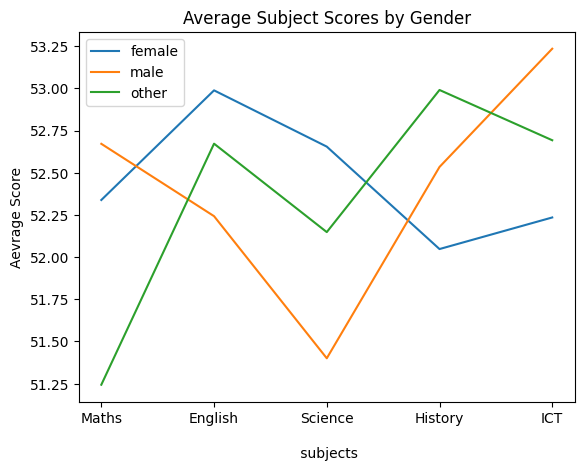

In [48]:
import matplotlib.pyplot as plt
subjects = ['Maths','English','Science','History','ICT']
Group_by_gender = df.groupby('Gender')[subjects].mean()

plt.figure()

for gender in Group_by_gender.index:
    plt.plot(subjects, Group_by_gender.loc[gender], label=gender)


plt.xlabel('\n subjects')
plt.ylabel('Aevrage Score')
plt.title('Average Subject Scores by Gender')
plt.legend()
plt.show()
